In [2]:
#importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing simpleimputer to impute null values
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

In [3]:
data=pd.read_csv(r"C:\Users\sivacatering\Documents\Afitech attachments\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,761.000000,761.000000,746.000000,754.00000,762.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.13435,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.926330,15.902731,116.102469,7.56570,0.332328,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.05000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.60000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


#### We can see null values present in some columns of this data

### using simpleimputer we impute null values with mean value

In [5]:
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')
#Here we transformed the data to fit with simpleimputer and made it as a dataframe and stored inside idf
idf=pd.DataFrame(imp.fit_transform(data))
#Here we replace column names and index of original dataset with idf
idf.columns=data.columns
idf.index=data.index

In [6]:
idf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.134350,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.839767,15.829996,114.425261,7.496334,0.331026,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,48.500000,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
idf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Here we can see that the null values are imputed with mean values and so there is no null values present in this dataset

## Data Visualization

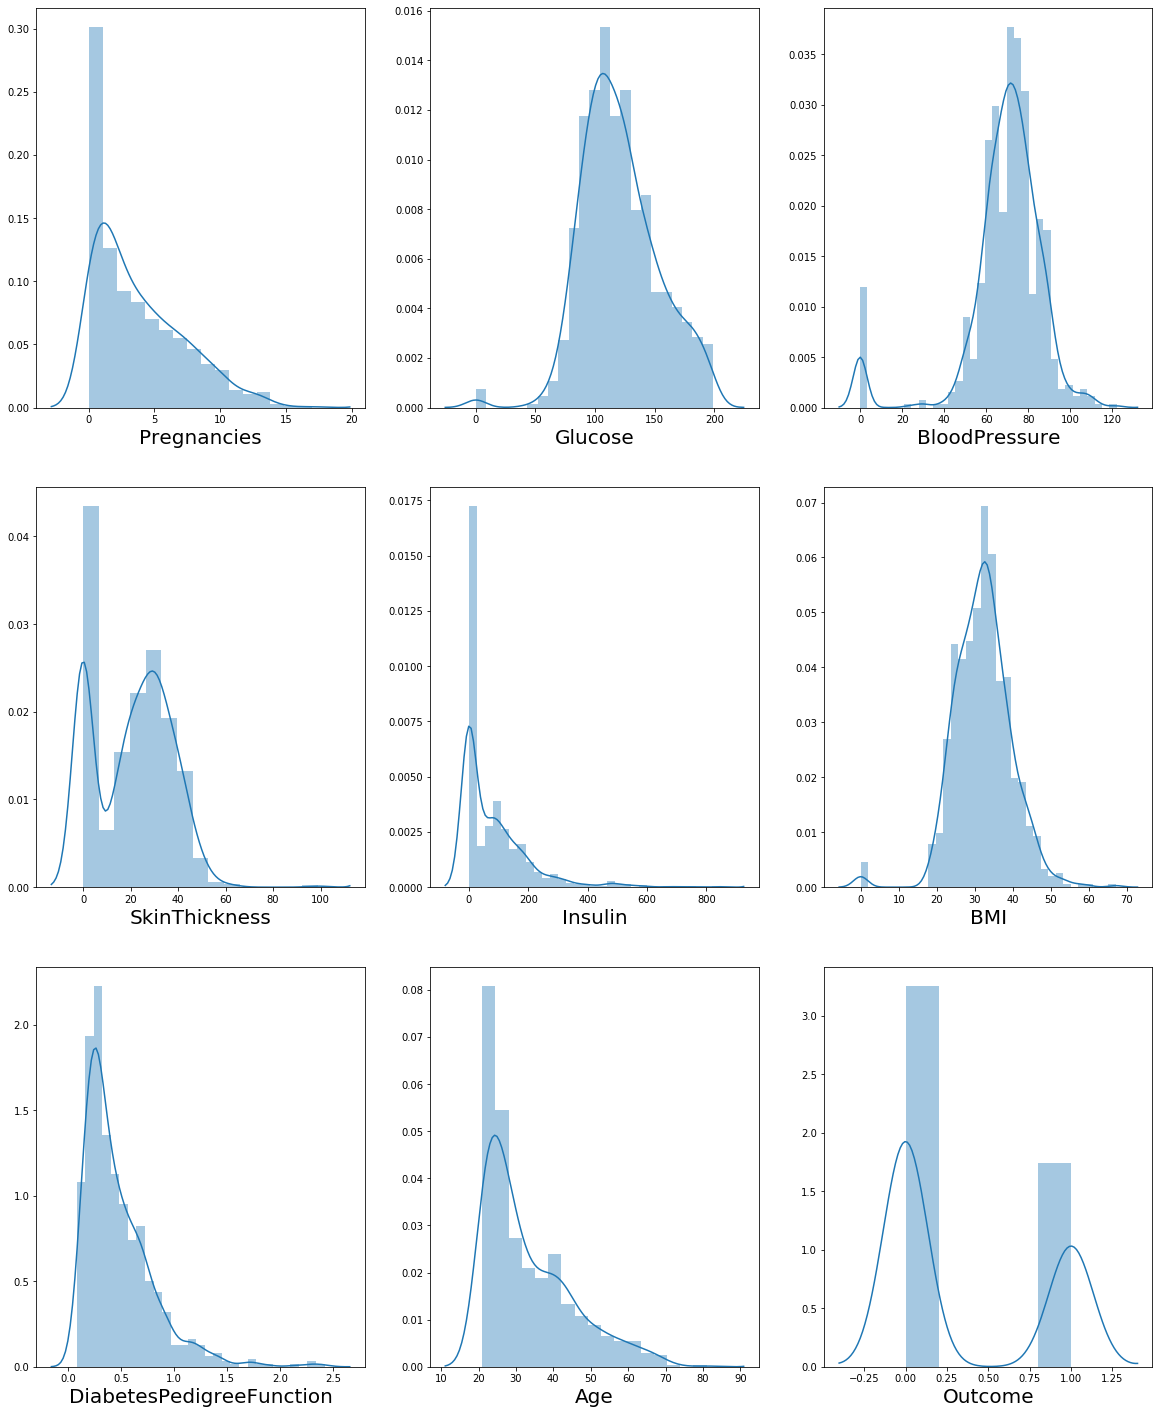

In [8]:
# visualization of how data is distributed in every column

plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in idf:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(idf[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## From the graphs we can see skewness present in some data and 
### we can see there few data for columns:
            Glucose
            Insulin
            skin thickness
            BMI and 
            Blood Pressure have value as 0. That's not possible.
### so we can replace those values with mean

In [9]:
idf["Glucose"]=idf["Glucose"].replace(0,idf["Glucose"].mean())
idf["Insulin"]=idf["Insulin"].replace(0,idf["Insulin"].mean())
idf["SkinThickness"]=idf["SkinThickness"].replace(0,idf["SkinThickness"].mean())
idf["BMI"]=idf["BMI"].replace(0,idf["BMI"].mean())
idf["BloodPressure"]=idf["BloodPressure"].replace(0,idf["BloodPressure"].mean())

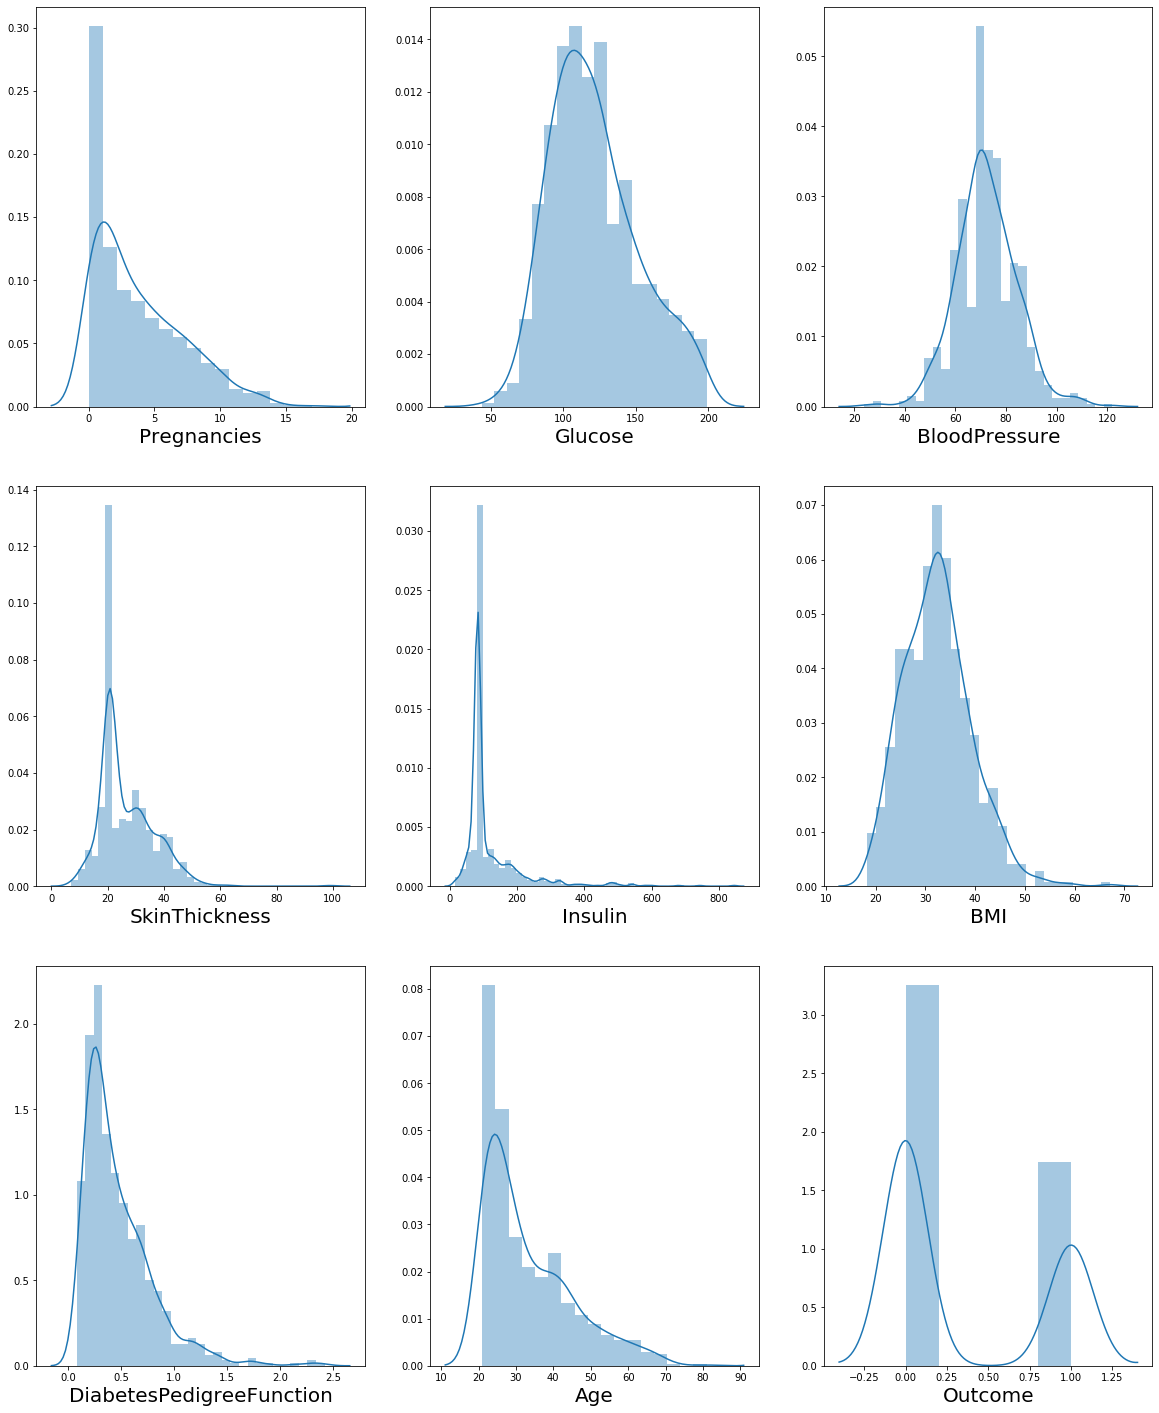

In [10]:
# once again we can visualize the data distribution
plt.figure(figsize=(20,25), facecolor='w')
plotnumber = 1

for column in idf:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(idf[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Now we have replaced the zeros with mean values but still there are some skewness present in the data

## Visualization of outliers present in the data using boxplot

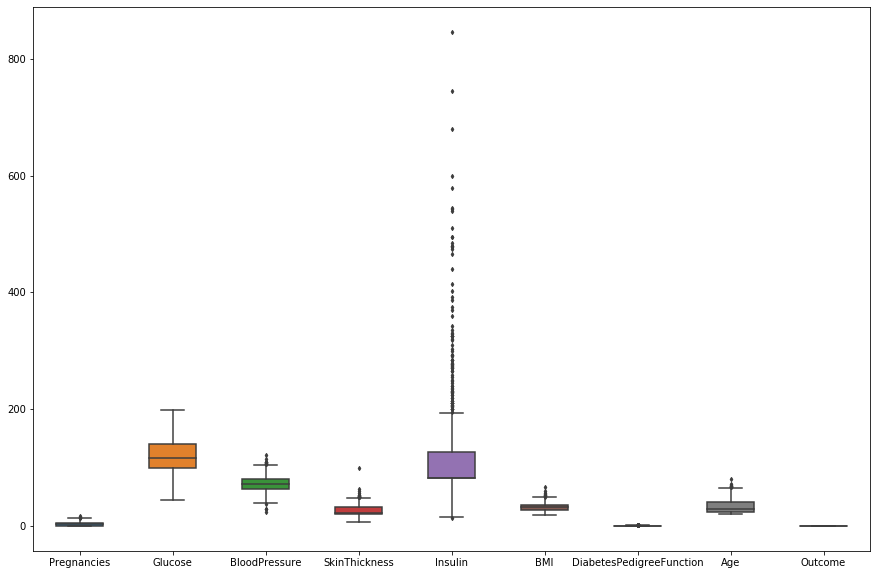

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=idf, width= 0.5,ax=ax,  fliersize=3)

### Using quantile method to control outliers

In [12]:
q = idf['Pregnancies'].quantile(0.97)
# we are removing the top 3% data from the Pregnancies column
data_cleaned = idf[idf['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.96)
# we are removing the top 4% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.97)
# we are removing the top 3% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

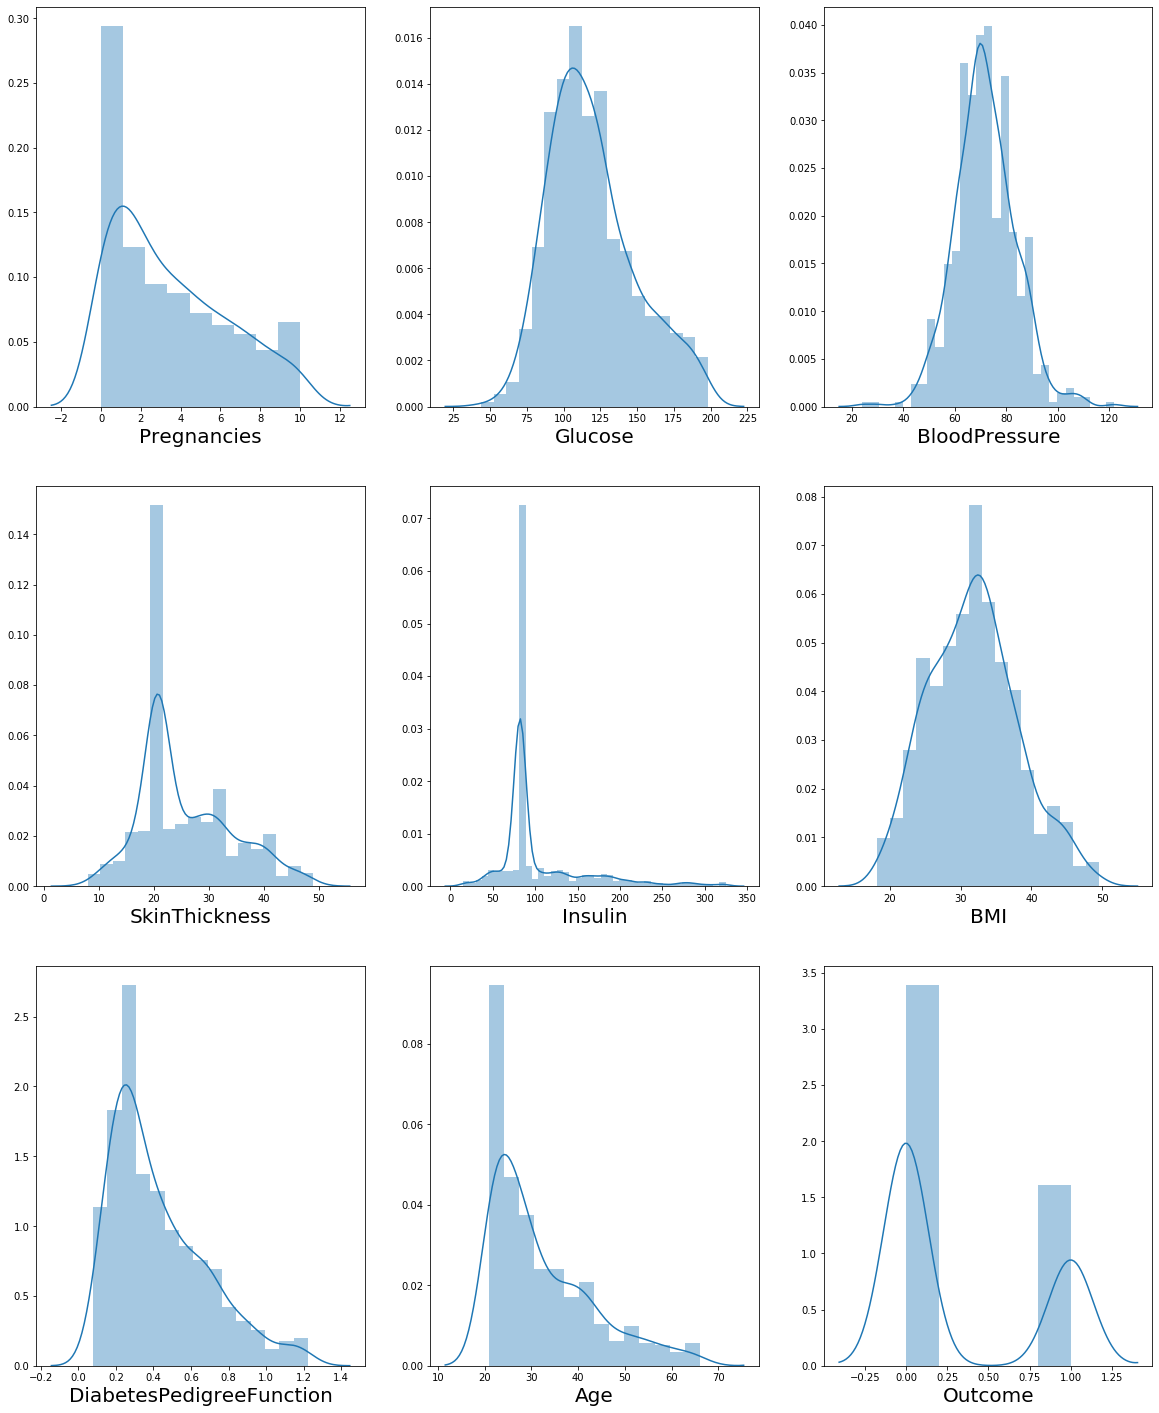

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Now the skewness in the data is reduced

### Using Striplot to understand the relation between features and label

In [14]:
X = idf.drop(columns = ['Outcome'])
y = idf['Outcome']

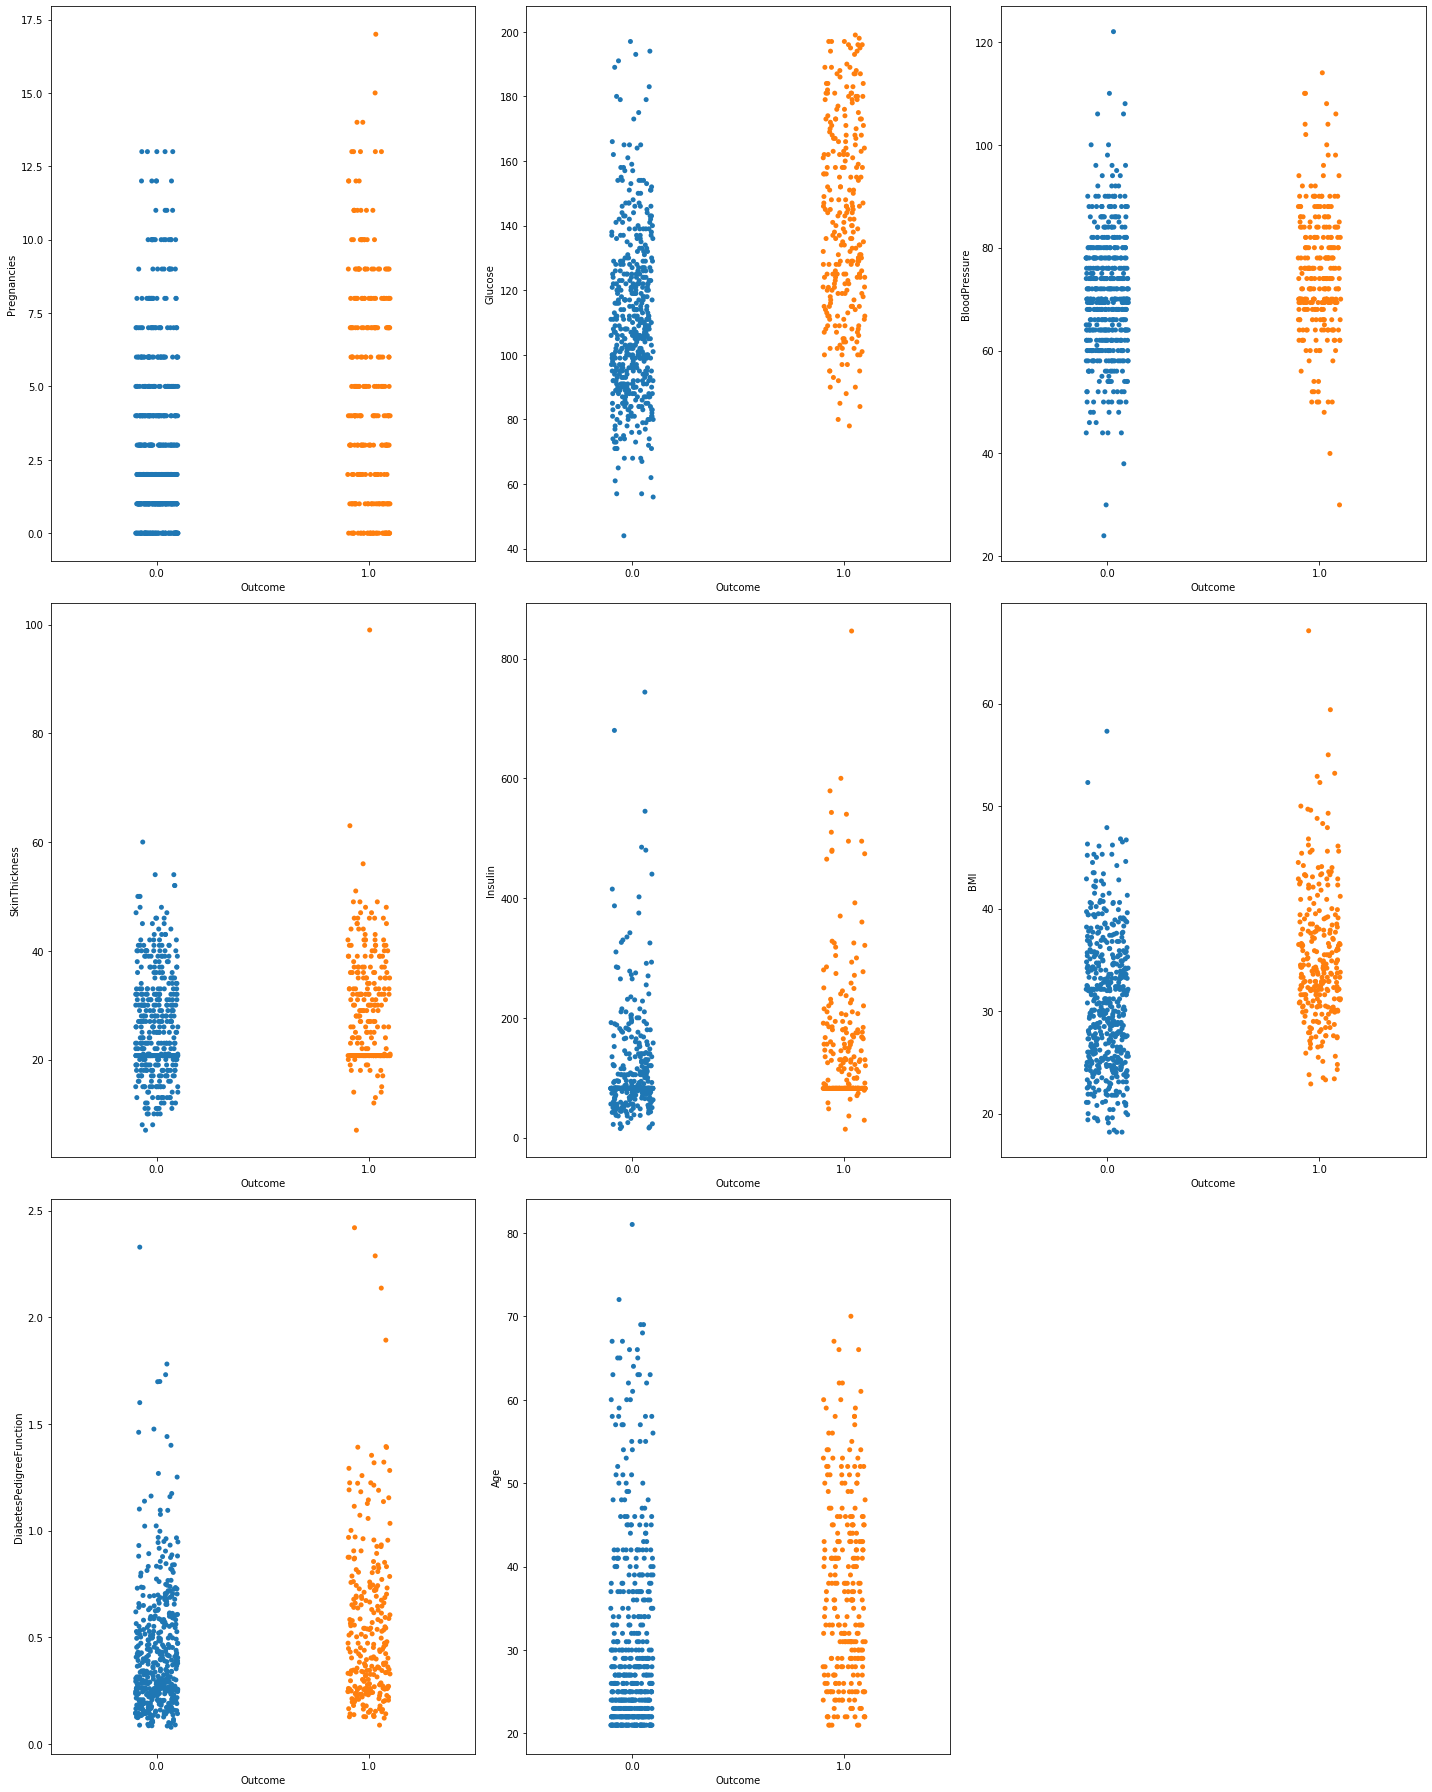

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

#### Scaling of data to make the dataset unitless

In [16]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

In [17]:
x_scaled

array([[ 0.63994726,  0.86527574, -0.01889519, ...,  0.17175246,
         0.46795576,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51580191, ..., -0.85340922,
        -0.36635992, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68143748, ..., -1.33669973,
         0.60398549, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.01889519, ..., -0.91198989,
        -0.68678551, -0.27575966],
       [-0.84488505,  0.14197684, -1.01270862, ..., -0.34082838,
        -0.37240569,  1.17073215],
       [-0.84488505, -0.94297153, -0.18453076, ..., -0.29689288,
        -0.47518371, -0.87137393]])

### Now we can check for multicollinearity between features using VIF(Variance Inflation Factor)

In [18]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.430781,Pregnancies
1,1.349684,Glucose
2,1.248578,BloodPressure
3,1.431426,SkinThickness
4,1.258512,Insulin
5,1.537474,BMI
6,1.059379,DiabetesPedigreeFunction
7,1.608651,Age


### As the VIF values are below 5.0 we can say that there is no multicollinearity in this dataset 

# Logistic Regression

In [579]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=470)

In [580]:
log_reg=(LogisticRegression())
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [581]:
predicted=log_reg.predict(x_test)

### Lets see how well our model is trained

In [582]:
log_reg.score(x_train,y_train)

0.7821229050279329

In [583]:
log_reg.score(x_test,y_test)

0.7532467532467533

### lets evaluate with other metrics

In [584]:
accuracy1=accuracy_score(y_test,predicted)
print("The accuracy in logistic regression is : ",accuracy)

The accuracy in logistic regression is :  0.7532467532467533


In [585]:
conf_mat = confusion_matrix(y_test,predicted)
print("The Confusion Matrix for logistic regression is : \n",conf_mat)

The Confusion Matrix for logistic regression is : 
 [[126  20]
 [ 37  48]]


In [586]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [624]:
# Precison
Precision1 = true_positive/(true_positive+false_positive)
print("The precision for logistic regression is : ",Precision1)

The precision for logistic regression is :  0.863013698630137


In [625]:
# Recall
Recall1 = true_positive/(true_positive+false_negative)
print("The Recall for logistic regression is : ",Recall1)

The Recall for logistic regression is :  0.7730061349693251


In [632]:
F1_Score1 = 2*(Recall1 * Precision1) / (Recall1 + Precision1)
print("The F1_Score for logistic regression is : ",F1_Score1)

The F1_Score for logistic regression is :  0.8155339805825242


In [590]:
# Area Under Curve
auc = roc_auc_score(y_test,predicted)
auc

0.7138597904915391

## Now lets see if we can increase our accuracy by feature selection using PCA

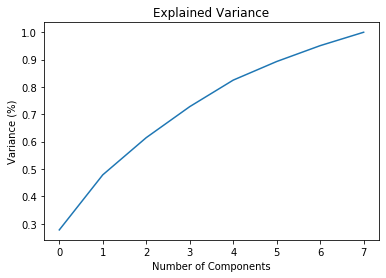

In [591]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

### We can see that around 95% of the variance is being explained by 6 components. 
### So instead of giving all columns as input in our algorithm let's use these 6 principal components instead.


In [592]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(x_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [593]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,1.413826,-0.721063,0.052301,0.646987,-0.408649,-0.766620
1,-1.488193,0.269298,-0.404581,0.080989,-0.311646,0.476852
2,0.097191,-1.010561,1.856833,0.351295,0.020405,-1.469365
3,-1.944223,0.468912,-0.386236,-0.630395,-0.124954,0.361518
4,1.163867,3.569660,1.989982,4.663697,-0.136047,-1.100632
...,...,...,...,...,...,...
763,2.126914,-1.666522,-0.888998,-0.002805,-2.332979,1.038521
764,-0.320357,0.620568,-0.597236,-0.368207,0.098728,-0.513647
765,-0.721179,-0.649334,0.261055,-0.545906,-0.122867,0.115430
766,-0.717982,-0.462115,0.580671,-0.095678,-0.118346,-0.728469


In [594]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 470)
#let's first visualize the tree on the data without doing any pre processing
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.7402597402597403

### There is a decrease in accuracy , it means that PCA  is not working in this model.
### So we need to consider all features to build a better model.

## Now let's do hyper parameter tuning and check whether our accuracy is increasing

In [595]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution
C = [1,1.3,1.7,2,2.6,3,3.3,3.6,3.9,4,4.2]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [596]:
log_tune = RandomizedSearchCV(log_reg, hyperparameters, random_state=470, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [597]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaled,y,test_size=0.30,random_state=470)

In [598]:
best_model = log_tune.fit(x1_train,y1_train)

C:\Users\sivacatering\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 22 is smaller than n_iter=100. Running 22 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [599]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [600]:
log=LogisticRegression(penalty='l2',C=1,random_state=470)

In [601]:
log.fit(x1_train,y1_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=470, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [602]:
log.score(x1_train,y1_train)

0.7821229050279329

In [603]:
log.score(x1_test,y1_test)

0.7532467532467533

In [604]:
pr=log.predict(x1_test)

In [606]:
accuracy1=accuracy_score(y1_test,pr)
accuracy1

0.7532467532467533

In [607]:
conf_mat = confusion_matrix(y1_test,pr)
print("The Confusion Matrix for logistic regression is : \n",conf_mat)

The Confusion Matrix for logistic regression is : 
 [[126  20]
 [ 37  48]]


In [608]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [618]:
# Precison
Precision1 = true_positive/(true_positive+false_positive)
print("The precision for logistic regression is : ",Precision1)

The precision for logistic regression is :  0.863013698630137


In [623]:
# Recall
Recall1 = true_positive/(true_positive+false_negative)
print("The Recall for logistic regression is : ",Recall1)

The Recall for logistic regression is :  0.7730061349693251


In [633]:
F1_Score1 = 2*((Recall1 * Precision1) / (Recall1 + Precision1))
print("The F1_Score for logistic regression is : ",F1_Score1)

The F1_Score for logistic regression is :  0.8155339805825242


In [621]:
auc1 = roc_auc_score(y1_test, pr)
auc1

0.7138597904915391

### After hyper parameter tuning, the accuracy is not increasing in this model and remains the same.

# KNN (K Nearest Neighbours)

In [230]:
from sklearn.neighbors import KNeighborsClassifier

In [231]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=470)

In [232]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [233]:
predicted_knn=knn.predict(x_test)

### Now lets how well our model trained in KNN

In [235]:
knn.score(x_train,y_train)

0.8007448789571695

In [236]:
knn.score(x_test,y_test)

0.7186147186147186

### lets evaluate with other metrics

In [237]:
accuracy2=accuracy_score(y_test,predicted_knn)
print("The accuracy score in KNN is : ", accuracy2)

The accuracy score in KNN is :  0.7186147186147186


In [238]:
conf_mat = confusion_matrix(y_test,predicted_knn)
conf_mat

array([[122,  24],
       [ 41,  44]], dtype=int64)

In [239]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [242]:
# Precison
Precision2 = true_positive/(true_positive+false_positive)
Precision2

0.8356164383561644

In [243]:
# Recall
Recall2 = true_positive/(true_positive+false_negative)
Recall2

0.7484662576687117

In [634]:
F1_Score2 = 2*(Recall2 * Precision2) / (Recall2 + Precision2)
F1_Score2

0.7987012987012988

In [245]:
# Area Under Curve
auc = roc_auc_score(y_test, predicted_knn)
auc

0.6766317485898469

## Now let's apply PCA(feature selection technique) and check whether accuracy is increasing

In [246]:
# let's see how well our model perform on this new data
x2_train,x2_test,y2_train,y2_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 470)
#let's first visualize the tree on the data without doing any pre processing
knn.fit(x2_train,y2_train)
knn.score(x2_test,y2_test)

0.7272727272727273

### PCA is performing well on this model and it is able to increase a slight raise in accuracy.

## Now let's apply hyper parameter tuning and check whether accuracy is increasing

In [386]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [15,22,25,29,33,37,42],
               'n_neighbors' : [7,9,10,11,12,13,17]
              }

In [387]:
knn_tune = RandomizedSearchCV(knn, param_grid,verbose=3)

In [388]:
knn_tune.fit(x2_train,y2_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=11, leaf_size=33, algorithm=kd_tree .................
[CV]  n_neighbors=11, leaf_size=33, algorithm=kd_tree, score=0.685, total=   0.0s
[CV] n_neighbors=11, leaf_size=33, algorithm=kd_tree .................
[CV]  n_neighbors=11, leaf_size=33, algorithm=kd_tree, score=0.713, total=   0.0s
[CV] n_neighbors=11, leaf_size=33, algorithm=kd_tree .................
[CV]  n_neighbors=11, leaf_size=33, algorithm=kd_tree, score=0.710, total=   0.0s
[CV] n_neighbors=11, leaf_size=33, algorithm=kd_tree .................
[CV]  n_neighbors=11, leaf_size=33, algorithm=kd_tree, score=0.832, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=11, leaf_size=33, algorithm=kd_tree .................
[CV]  n_neighbors=11, leaf_size=33, algorithm=kd_tree, score=0.813, total=   0.0s
[CV] n_neighbors=13, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=13, leaf_size=25, algorithm=ball_tree, score=0.685, total=   0.0s
[CV] n_neighbors=13, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=13, leaf_size=25, algorithm=ball_tree, score=0.722, total=   0.0s
[CV] n_neighbors=13, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=13, leaf_size=25, algorithm=ball_tree, score=0.738, total=   0.0s
[CV] n_neighbors=13, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=13, leaf_size=25, algorithm=ball_tree, score=0.832, total=   0.0s
[CV] n_neighbors=13, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=13, leaf_size=25, algorithm=ball_tree, score=0.813, total=   0.0s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [15, 22, 25, 29, 33, 37,
                                                      42],
                                        'n_neighbors': [7, 9, 10, 11, 12, 13,
                                                        17]},
                   pre_dispatch='2*n_jobs', random

In [389]:
knn_tune.best_params_

{'n_neighbors': 13, 'leaf_size': 25, 'algorithm': 'ball_tree'}

In [392]:
knn_b = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =25, n_neighbors =13)

In [393]:
knn_b.fit(x2_train,y2_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [394]:
knn_b.score(x2_train,y2_train)

0.7970204841713222

In [395]:
knn_b.score(x2_test,y2_test)

0.7316017316017316

In [396]:
prk=knn_b.predict(x2_test)

In [398]:
accuracy2=accuracy_score(y2_test,prk)
accuracy2

0.7316017316017316

In [399]:
conf_mat = confusion_matrix(y2_test,prk)
conf_mat

array([[123,  23],
       [ 39,  46]], dtype=int64)

In [400]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [401]:
# Precison
Precision2 = true_positive/(true_positive+false_positive)
Precision2

0.8424657534246576

In [402]:
# Recall
Recall2 = true_positive/(true_positive+false_negative)
Recall2

0.7592592592592593

In [635]:
F1_Score2 = 2*(Recall2 * Precision2) / (Recall2 + Precision2)
F1_Score2

0.7987012987012988

In [404]:
auc2 = roc_auc_score(y2_test, prk)
auc2

0.6918211120064465

### Now we can see a slight increase in accuracy after parameter tuning

# Decision Tree

In [522]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [523]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x_scaled,y,test_size=0.30,random_state=470)

In [524]:
clf=DecisionTreeClassifier()
clf.fit(x3_train,y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [525]:
predicted_clf=clf.predict(x3_test)

### Now lets see how well our model trained in Decision tree

In [526]:
clf.score(x3_train,y3_train)

1.0

In [527]:
clf.score(x3_test,y3_test)

0.6883116883116883

### lets evaluate with other metrics

In [528]:
print("The accuracy score in Decision Tree is : ", accuracy_score(y_test,predicted_clf))

The accuracy score in Decision Tree is :  0.6883116883116883


In [529]:
conf_mat = confusion_matrix(y_test,predicted_clf)
conf_mat

array([[105,  41],
       [ 31,  54]], dtype=int64)

In [530]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [531]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7191780821917808

In [532]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7720588235294118

In [533]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7446808510638298

In [534]:
# Area Under Curve
auc = roc_auc_score(y3_test, predicted_clf)
auc

0.6772360999194198

### In this model we can see that the train data is trained too well and have 100% score but our test data has only 68% score.
### So this may occur due to overfitting.

## Now let's apply PCA(feature selection technique) and check whether we can overcome the overfitting and increase our accuracy.

In [535]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 470)
#let's first visualize the tree on the data without doing any pre processing
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [536]:
clf.score(x_train,y_train)

1.0

In [537]:
clf.score(x_test,y_test)

0.6493506493506493

### Here our accuracy is again decreasing.
### So the PCA technique is not working here.

## Now let's apply hyper parameter tuning and check whether we can overcome the overfitting and increase our accuracy

In [538]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x_scaled,y,test_size=0.30,random_state=470)

In [539]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,30,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [540]:
dt_tune = RandomizedSearchCV(clf,grid_param,cv=5,n_jobs =-1)

In [541]:
dt_tune.fit(x3_train,y3_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [542]:
dt_tune.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 9,
 'max_depth': 8,
 'criterion': 'entropy'}

In [543]:
dt_tune.best_score_

0.7561613014884043

In [544]:
clf_t = DecisionTreeClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf= 9, min_samples_split= 9, splitter ='random')
clf_t.fit(x3_train,y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [545]:
clf_t.score(x3_train,y3_train)

0.7783985102420856

In [546]:
clf_t.score(x3_test,y3_test)

0.7445887445887446

In [547]:
prd=clf_t.predict(x3_test)

In [548]:
accuracy3=accuracy_score(y3_test,prd)
accuracy3

0.7445887445887446

In [549]:
conf_mat = confusion_matrix(y3_test,prd)
conf_mat

array([[127,  19],
       [ 40,  45]], dtype=int64)

In [550]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [551]:
# Precison
Precision3 = true_positive/(true_positive+false_positive)
Precision3

0.8698630136986302

In [552]:
# Recall
Recall3 = true_positive/(true_positive+false_negative)
Recall3

0.7604790419161677

In [636]:
F1_Score3 = 2*(Recall3 * Precision3) / (Recall3 + Precision3)
F1_Score3

0.8115015974440895

In [637]:
auc3 = roc_auc_score(y3_test, prd)
auc3

0.6996373892022563

### By Hyper parameter tuning we are able to overcome the overfitting and our accuracy is also increased

# Overall scores for each models

In [638]:
datal = {'Accuracy':[accuracy1,accuracy2,accuracy3], 'Precision':[Precision1,Precision2,Precision3], 'Recall':[Recall1,Recall2,Recall3], 'F1_Score':[F1_Score1,F1_Score2,F1_Score3]} 
  
# Creates pandas DataFrame. 
dfl = pd.DataFrame(datal, index =['Logistic Regression', 'KNN', 'Decision_Tree']) 
  
# print the data 
dfl

,Accuracy,Precision,Recall,F1_Score
Logistic Regression,0.753247,0.863014,0.773006,0.815534
KNN,0.731602,0.842466,0.759259,0.798701
Decision_Tree,0.744589,0.869863,0.760479,0.811502


In [639]:
from sklearn.metrics import plot_roc_curve

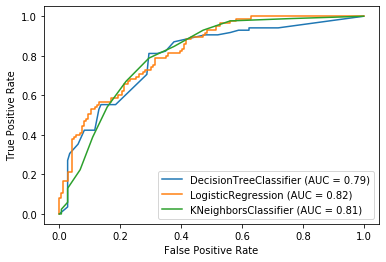

In [640]:
#Finally Plot ROC AUC curve
disp = plot_roc_curve(clf_t,x3_test,y3_test)
plot_roc_curve(log,x1_test,y1_test,ax=disp.ax_)
plot_roc_curve(knn_b,x2_test,y2_test,ax=disp.ax_)
plt.show()

# Conclusion :

###     - From the above graph we can see that the Logistic regression and KNN classifier are performing well than decision tree.
###     - The Logistic Regression has highest AUC and covers most area.
###     - Also Logistic regression has produced high scores in the above metrics.
###     - So we can go with logistic regression to obtain better result on predicting whether a person has diabetes or not.